Head of the DataFrame:
  observation_date  CPIAUCSL
0       01/01/1947     21.48
1       01/02/1947     21.62
2       01/03/1947     22.00
3       01/04/1947     22.00
4       01/05/1947     21.95

Column names in your DataFrame: Index(['observation_date', 'CPIAUCSL'], dtype='object')

DataFrame with date as index:
                  CPIAUCSL
observation_date          
1947-01-01           21.48
1947-01-02           21.62
1947-01-03           22.00
1947-01-04           22.00
1947-01-05           21.95

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939 entries, 1947-01-01 to 2025-01-03
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  939 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB
None

Head of DataFrame with Normalized CPI:
                  CPIAUCSL  CPI_Normalized
observation_date                          
1947-01-01           21.48      100.000000
1947-01-02     

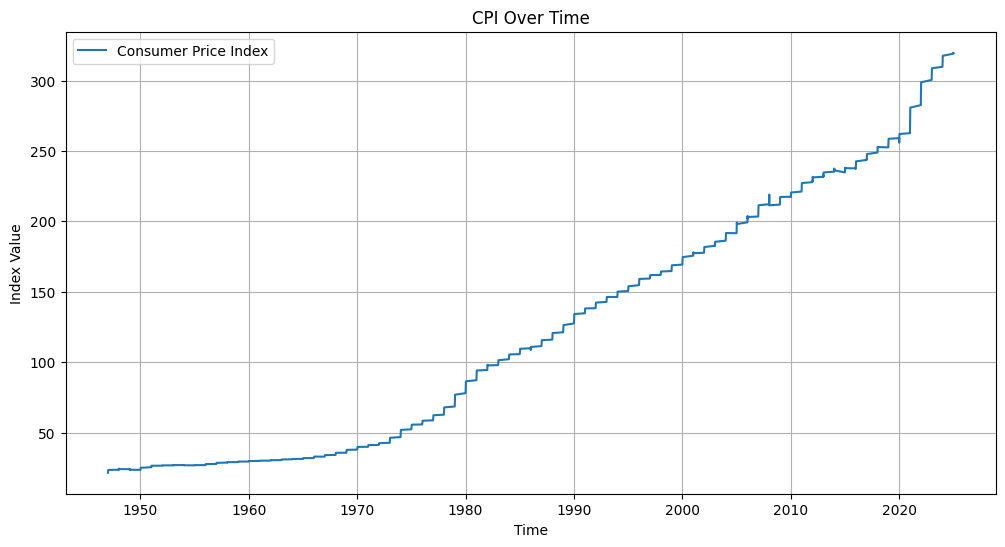

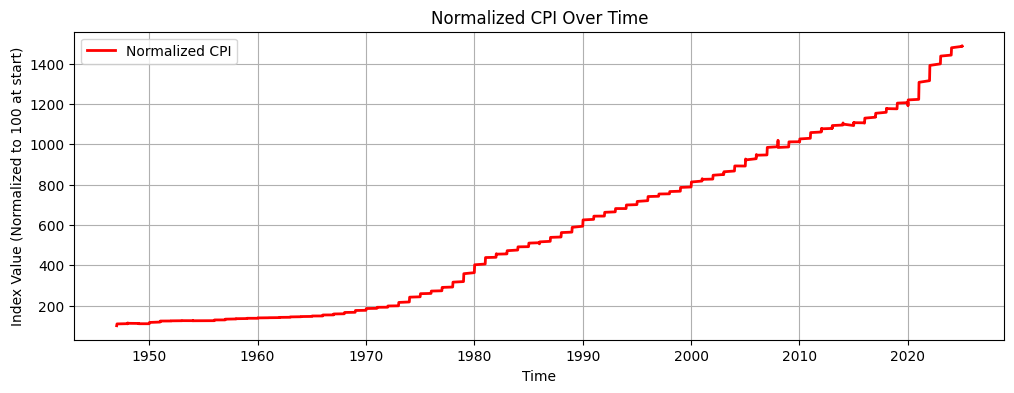


--- Decomposition of Normalized CPI ---
Trend (first few values):
 observation_date
1947-01-01    100.313195
1947-01-02    101.016755
1947-01-03    101.720315
1947-01-04    102.423875
1947-01-05    103.127435
Name: trend, dtype: float64
Seasonal (first few values):
 observation_date
1947-01-01    0.999974
1947-01-02    1.000142
1947-01-03    0.999815
1947-01-04    0.999729
1947-01-05    0.999581
Name: seasonal, dtype: float64
Residual (first few values):
 observation_date
1947-01-01    0.996903
1947-01-02    0.996245
1947-01-03    1.007073
1947-01-04    1.000242
1947-01-05    0.991307
Name: resid, dtype: float64


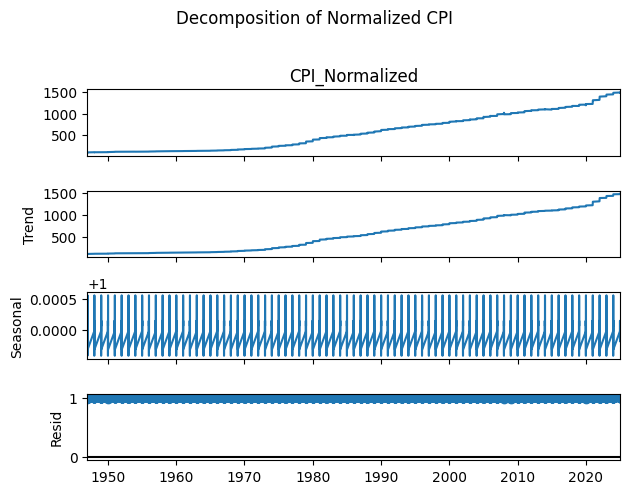

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# --- Configuration ---
file_path = 'C:/Users/USER/Downloads/CPIAUCSL.csv'  # <--- IMPORTANT: UPDATE THIS PATH
date_column = 'observation_date'  # Date column name from your CPI data
price_column = 'CPIAUCSL'          # CPI column name from your CPI data
date_format = '%m/%d/%Y'            # Date format from your CPI data
frequency = 12                      # Assuming monthly data
decomposition_model = 'multiplicative'

# --- Load the dataset ---
try:
    df = pd.read_csv(file_path)
    print("Head of the DataFrame:")
    print(df.head())
    print("\nColumn names in your DataFrame:", df.columns)

    # Convert the date column to datetime objects and set as index
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)
    df.set_index(date_column, inplace=True)
    df = df.dropna(subset=[price_column])

    print("\nDataFrame with date as index:")
    print(df.head())
    print("\nInfo of the DataFrame:")
    print(df.info())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the CSV file. Please check the column names.")
    exit()
except ValueError as e:
    print(f"Error: Could not parse date. Please check the 'date_format' variable. Details: {e}")
    exit()

# --- Normalize and plot the CPI data ---
if not df.empty:
    if df[price_column].iloc[0] == 0:
        print("Error: The first value in CPI is zero. Cannot normalize.")
        exit()

    df['CPI_Normalized'] = (df[price_column] / df[price_column].iloc[0]) * 100

    print("\nHead of DataFrame with Normalized CPI:")
    print(df.head())

    # --- Plot the CPI data ---
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[price_column], label='Consumer Price Index')
    plt.title('CPI Over Time')
    plt.xlabel('Time')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Plot the normalized CPI ---
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df['CPI_Normalized'], label='Normalized CPI', linewidth=2, color='red')
    plt.title('Normalized CPI Over Time')
    plt.xlabel('Time')
    plt.ylabel('Index Value (Normalized to 100 at start)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Decompose the CPI time series ---
    try:
        decomposition = seasonal_decompose(df['CPI_Normalized'], model=decomposition_model, period=frequency, extrapolate_trend='freq')
        print("\n--- Decomposition of Normalized CPI ---")
        print("Trend (first few values):\n", decomposition.trend.head())
        print("Seasonal (first few values):\n", decomposition.seasonal.head())
        print("Residual (first few values):\n", decomposition.resid.head())

        decomposition.plot()
        plt.suptitle('Decomposition of Normalized CPI', y=1.02)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\nError during decomposition of CPI: {e}. Ensure your data has enough periods for decomposition.")

else:
    print("DataFrame is empty, cannot plot.")